# Turning Mathemetical Formulas into Code

We have reached a point where we have quite a few tools at our disposal. We have learned enough Python to write programs containing loops or conditions and we have discussed Python's data structures. We learned that NumPy provides a large number of functions that can be applied to arrays or vectors that represent sampled signals.

In this lab, we will look at some of the mathematical formulas we will encounter and study how they can be translated into code. using NumPy and Python.

Our focus is on spectrum synthesis and spectrum analysis. 
* Spectrum synthesis refers to writing a signal as a sum of sinusoids
* spectrum analysis refers to determining which spectral components a given signal contains

For certain periodic signals we will be able to perform both operations numerically.

In [1]:
## configure plotting
%matplotlib inline
import matplotlib.pyplot as plt

# and import NumPy
import numpy as np

## Spectrum Synthesis

In class, we have been looking at *synthesizing* signals from its *spectrum representation*. The fundamental idea behind the spectrum representation is to express a signal $x(t)$ as a *sum of complex exponential signals*.

The spectrum representation consists of a list $X(f)$ of pairs that enumerate all combinations of phasors $X_k$ and frequencies $f_k$ that are needed to synthesize the signal $x(t)$.

From the spectrum representation $X(f)$ we can synthesize the signal $x(t)$ by:
1. turning each phasor/frequency pair into a complex exponential signal
2. adding these complex exponentials

The corresponding formula for converting the spectrum representation $X(f) = \{(X_k, f_k)\}$ into the signal $x(t)$ is
$$
x(t) = \sum_k X_k \cdot e^{j2\pi f_k t}.
$$

We will write a function that performs the computations implied by this formula, but first let's construct an example.

### Running example: A product of two sinusoids

Consider the signal 
$$
x(t) = 4 \cdot \cos(2\pi 20t) \cdot \cos(2\pi 2t) \quad \text{for $0 \leq t < 1$.}
$$

This signal is plotted below.

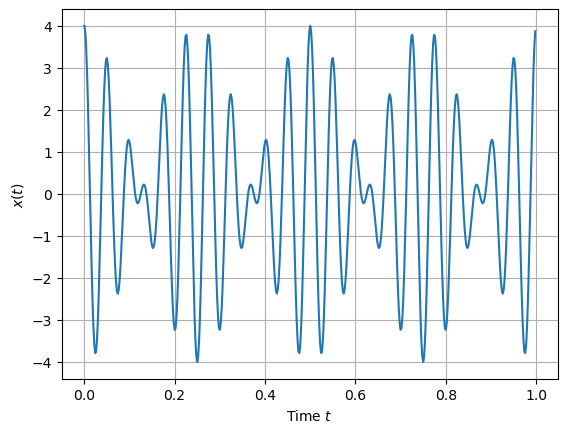

In [2]:
## plot product of sinusoids
# make a time grid
fs = 500
tt = np.arange(0, 1, 1/fs)

xx = 4 * np.cos(2*np.pi*20*tt) * np.cos(2*np.pi*2*tt)

plt.plot(tt, xx)
plt.xlabel('Time $t$')
plt.ylabel('$x(t)$')
plt.grid()

plt.show()

#### Analysis: Spectrum representation of $x(t)$

The signal is clearly not a sinusoid. It is difficult to describe concisely. 

It is also not obvious that the signal is a sum of complex exponentials, unless we do some work to rewrite it:
$$
\begin{align*}
    x(t) & = 4 \cdot \cos(2\pi 20t) \cdot \cos(2\pi 2t) \\
         & = 4 \cdot \frac{e^{j2\pi 20 t} + e^{-j2\pi 20 t}}{2} \cdot \frac{e^{j2\pi 2 t} + e^{-j2\pi 2 t}}{2} \\
         & = 1\cdot e^{-j2\pi 22 t} + 1\cdot e^{-j2\pi 18 t} + 1\cdot e^{j2\pi 18 t} + 1\cdot e^{j2\pi 22 t} \\
         & = 2 \cos(2\pi 18 t) + 2 \cos(2\pi 22 t).
\end{align*}
$$

Thus, we see (from the next-to-last line) that $x(t)$ does indeed consist of a sum of complex exponential signals. We can read off the spectrum representation as
$$
X(f) = \{(1, -22), (1, -18), (1, 18), (1, 22)\}
$$
where we have simply extracted the phasors $X_k$ (all equal to $1$ for this signal) and frequencies $f_k$ ($\pm 18$ and $\pm 22$) and collected them in a list.

Below, we construct a list-of-lists for this spectrum and plot it as a stem plot.

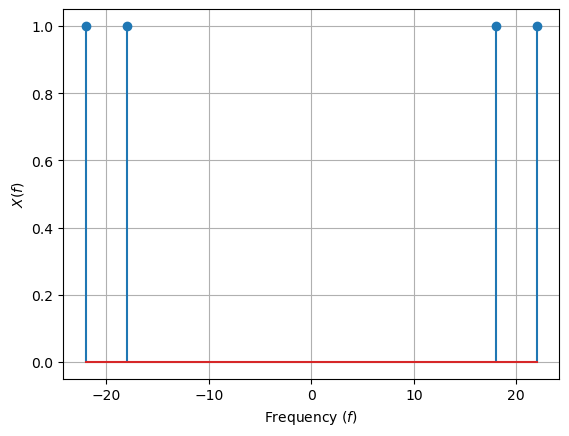

In [3]:
## construct a list representing the spectrum and plot it
# a list of lists is used to hold the spectrum
XX = [[1, 1, 1, 1],         # phasors
      [-22, -18, 18, 22]]   # frequencies

plt.stem(XX[1], XX[0])
plt.grid()
plt.xlabel('Frequency ($f$)')
plt.ylabel('$X(f)$')

plt.show()

This plot makes it clear that the signal:
* consists of the sum of 4 complex exponentials
* the frequencies of these complex exponentials are the frequencies where the stems are placed
* the corresponding phasors are represented by the height of the stems

<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #e7f3fe; border-left: 6px solid #2196F3;">
This is a very concise explanation of the signal in terms of the complex exponentials that constitute the signal. It reveals structure that is not readily apparent in the time-domain plot above.
</p>
<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #ffffcc; border-left: 6px solid #ffeb3b;">
The phasors are usually complex-valued. If so, we will plot both the magnitude of the phasor and the phase angle of the phasor.
</p>

#### Synthesis: getting the signal back

We claimed that we can recover the signal $x(t)$ from the spectrum $X(f)$, i.e., that $X(f)$ contains a complete, equivalent description for the signal.

To do so so, we must compute:
$$
x(t) = \sum_k X_k \cdot e^{j2\pi f_k t}.
$$

This formula says, we can recover the signal $x(t)$ for the spectrum pairs $(X_k, f_k)$ by
1. turning each phasor/frequency pair into a complex exponential signal
2. adding these complex exponentials

Let's write a function to do that. The inputs (parameters) to the function are 
* a list of lists `XX` of phasors and frequencies and 
* a time grid `tt`

In [4]:
def synthesize_from_list(XX, tt):
    """Synthesize a signal from its spectrum
    
    Parameters:
    -----------
    XX - a list-of-lists of phasors and frequencies (`XX[0]` asre phasors, `XX[1]` are frequencies)
    tt - time grid

    Returns
    -------
    NumPy array containing the signal
    """

    # initialize the array for the result to zero
    res = np.zeros_like(tt)

    # add one complex exponential at a time to the array for the result
    for k in range(len(XX[0])):
        res = res + XX[0][k] * np.exp(2j*np.pi * XX[1][k] * tt)

    return res

This function reflects the usual approach to compute a sum of terms:
1. begin by initializing the variable that will hold the result to zero
  - here, the result is a NumPy array of the same length as tt
2. then, loop over the terms to be added and accumulate them in the results variable
  - here each term is a complex exponential signal
  - phasors and frequencies are provided in the array `XX`
  - accumulation happens as we compute a new value for `res` from the old value for `res` plus a complex exponential

<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #ffffcc; border-left: 6px solid #ffeb3b;">
This pattern of computation is very common. It works for sums, products, maxima, and others. Make sure that you understand the principle.
</p>

We conclude the example by using our function to synthesize the signal from the spectrum.

The resulting signal is plotted; it is identical to what we started with.

<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #ffffcc; border-left: 6px solid #ffeb3b;">
Note: the signal returned by our function is complex-valued. However, the imaginary part is zero. Both real and imaginary parts are plotted below. Usually, we would plot only the real part of the imaginary part is zero.
</p>

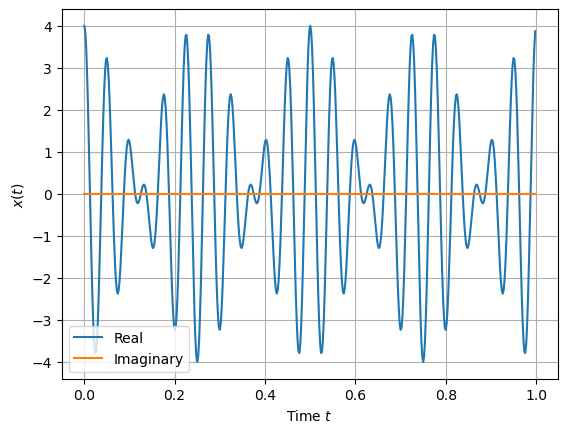

In [5]:
## synthesize signal and plot it
xr = synthesize_from_list(XX, tt)

plt.plot(tt, xr.real, label='Real')
plt.plot(tt, xr.imag, label='Imaginary')

plt.grid()
plt.xlabel('Time $t$')
plt.ylabel('$x(t)$')
plt.legend()

plt.show()

## Important Special Case: Periodic Signal

An important special case occurs when the signal $x(t)$ is periodic with a fundamental frequency $f_0$ that is an integer fraction of the sample rate, i.e., when $f_0 = \frac{f_s}{N}$. 

For these signals, we will be able to perform spectrum analysis and synthesis numerically. 

**Fact:** Any periodic signal $x(t)$ with period $\frac{1}{f_0} = \frac{N}{f_s}$ can be written as a sum of complex exponential signals with frequencies $f_k = k \frac{f_s}{N}$ for $k=-\frac{N}{2}, \ldots, \frac{N}{2}-1$, i.e.,
$$
\begin{align}
x(t)  = \sum_{k=-\frac{N}{2}}^{\frac{N}{2}-1} X[k] e^{j 2\pi f_k t}  = \sum_{k=-\frac{N}{2}}^{\frac{N}{2}-1} X[k] e^{j 2\pi k \frac{f_s}{N} t}
\end{align}
$$

### Sampled Periodic Signals

When we sample such a periodic signal at rate $f_s$, we obtain the sampled (discrete-time) signal $x[n] = x(n/f_s)$. With that sampling rate, samples $x[n] = x(n/f_s)$ repeat every $N$ samples, i.e., $x[n] = x[n+N]$ for all $n$. Thus, the discrete-time signal is periodic as well.

<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #e7f3fe; border-left: 6px solid #2196F3;">
Recall that we are denoting sampled, discrete-time signals as <tt>x[n]</tt> and continuous-time signals as <tt>x(t)</tt>.
</p>

We can write the sampled signal as a sum of sinusoids as well by simply replacing $t=n/f_s$.
$$
\begin{align}
x[n] = x(n/f_s)  = \sum_{k=-\frac{N}{2}}^{\frac{N}{2}-1} X[k] e^{j 2\pi f_k n/f_s}  = \sum_{k=-\frac{N}{2}}^{\frac{N}{2}-1} X[k] e^{j 2\pi k \frac{f_s}{N} \frac{n}{f_s}}.
\end{align}
$$

Note that we can cancel $f_s$ and arrive at the following expression:
$$
x[n] = \sum_{k=-\frac{N}{2}}^{\frac{N}{2}-1} X[k] e^{j 2\pi \frac{kn}{N}}.
$$

This expression gives as a synthesis formula for samples of a signal. 

Let us illustrate by means of the original example.

### Example: product of sinusoids

We found above that the product of sinusoids
$$
x(t) = 4 \cdot \cos(2\pi 20t) \cdot \cos(2\pi 2t)
$$
has a spectrum that is equal to
$$
X(f) = \{(1, -22), (1, -18), (1, 18), (1, 22)\}.
$$

If we choose a sampling rate of $f_s=500$ and consider $N=500$ samples, then $f_0=\frac{f_s}{N}=1$. 

The frequencies $f_k$ equal to $\pm 18$ and $\pm 22$ are all integer multiples of $f_0$, e.g., $-22 = -22 \cdot f_0$. Hence, this sampled signal is periodic with period $N$.  

Therefore, we recognize that in the above synthesis formula
$$
X[k] = \begin{cases}
1 & \text{for $k=\pm 22, \pm 18$} \\
0 & \text{else,}
\end{cases}
\quad \quad \text{$k=-\frac{N}{2}, \ldots, \frac{N}{2}-1$.}
$$

### Using a vector to represent the spectrum 

Instead of using a list that provides pairs of phasors and frequencies, we can use a length $N$ vector to store the spectrum values $X[k]$. 

The only (slightly) unusual aspect is that the indices $k$ run from $-\frac{N}{2}$ to $\frac{N}{2}-1$. However, we can easily map from $k$ to a 0-based index into our array by simply adding $\frac{N}{2}$ to $k$.

A function to convert from a list of pairs of phasors and frequencies is shown below. Keep in mind that all frequencies in this list are assumed to be integer multiples of $f_0=\frac{f_s}{N}$.

In [6]:
def spectrum_list_to_vector(spectrum_list, fs, N):
    """convert a list-based spectrum to a representation using a vector
    
    Parameters:
    -----------
    spectrum_list - list containing pairs of phasors and frequencies
    fs - sample rate
    N - number of samples 

    Returns:
    --------
    Two NumPy arrays

    Usage:
    ------
    Xv, fv = spectrum_list_to_vector(spectrum_list, fs, N)
    """

    Xvec = np.zeros(N, dtype=complex)
    fvec = np.arange(-N/2, N/2) * fs/N

    f0 = fs/N

    # loop through the list
    for n in range(len(spectrum_list[0])):
        Xk = spectrum_list[0][n]            # unpack phasor and frequency
        fk = spectrum_list[1][n]
        k = int(fk/f0)                      # find index k such that k*f0 = fk
        Xvec[k + N//2] = Xk                 # insert in spectrum vector, map k to a non-negative index

    return Xvec, fvec

For the spectrum list `XX` for our product of sinusoids, we compute the spectrum vector and make a stem plot to verify that we get the same result as before. The only difference to the earlier spectrum plot is that we mark many of the frequencies as having a zero-phasor.

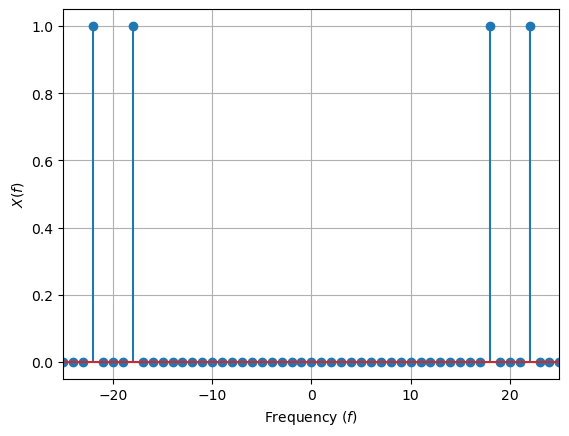

In [7]:
## Compute the spectrum vector
fs = 500
N =500
Xv, fv = spectrum_list_to_vector(XX, fs, N)

# and plot it
plt.stem(fv, np.abs(Xv))
plt.grid()
plt.xlabel('Frequency ($f$)')
plt.ylabel('$X(f)$')
plt.xlim(-25, 25)

plt.show()

### Synthesis from vector representation of spectrum

We have not really accomplished much at this point: we merely switched from a list-based representation to a vector-based representation of the spectrum. We will see shortly that we can compute this spectrm vector numerically.

Before doing that, let us write a function that synthesizes the signal samples from the spectrum vector. 

I.e., we want a function that implements the synthesis formula
$$
x[n] = \sum_{k=-\frac{N}{2}}^{\frac{N}{2}-1} X[k] e^{j 2\pi \frac{kn}{N}}.
$$

Note that this formula does not involve the sampling rate $f_s$ and that $N$ can be obtained from the length of the spectrum vector.

In [8]:
def synthesize_from_vector(Xvec):
    """Synthesize a signal from its spectrum
    
    Parameters:
    -----------
    Xvec - a length N vector representation of the spectrum

    Returns
    -------
    NumPy array containing the signal
    """
    N = len(Xvec)
    xx = np.zeros_like(Xvec)

    for k in range(-N//2, N//2):
        cplx_exp = np.exp(2j*np.pi * k/N * np.arange(N))
        xx = xx + Xvec[k + N//2] * cplx_exp

    return xx

In this function, we translated the synthesis formula
$$
x[n] = \sum_{k=-\frac{N}{2}}^{\frac{N}{2}-1} X[k] e^{j 2\pi \frac{kn}{N}}.
$$
to code.

1. we extracted the length $N$ and initialized the vector `xx` to zero.
2. Next, we looped over all frequency indices $k$
    - recall that the frequency indices run form $-\frac{N}{2}$ to $\frac{N}{2}$.
3. In each iteration of the loop:
    - compute a complex exponential of frequency $k/N$ 
    - for a vector $n=0, \ldots, N-1$
    - We scale the complex exponential by $X[k]$
    - and accumulate the scaled complex exponentials.

To verify that this works, we synthesize the signal for the spectrum vector $Xv$. The expected result is that we get the product of sinusoids back.

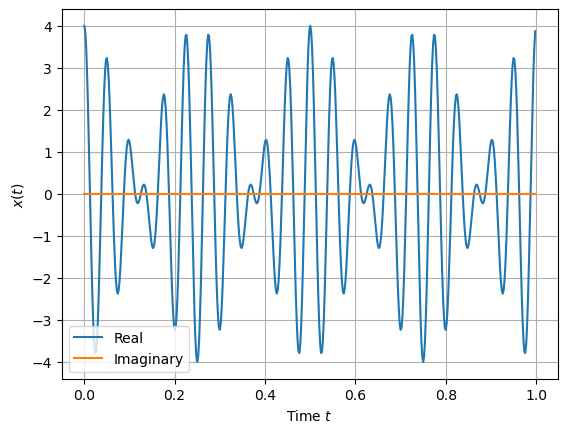

In [9]:
# synthesize the signal and plot
xv = synthesize_from_vector(Xv)
tt = np.arange(len(xv)) / fs

plt.plot(tt, xv.real, label='Real')
plt.plot(tt, xv.imag, label='Imaginary')

plt.grid()
plt.xlabel('Time $t$')
plt.ylabel('$x(t)$')
plt.legend()

plt.show()

## Analysis: Finding the spectrum vector numerically

In the prior to labs, we showed that we can measure the phasor of a sinusoid using a complex exponential signal. This idea works even for the periodic signals considered here. 

Specifically, we can compute the spectrum vector using the following analysis formula:
$$
X[k] = \frac{1}{N} \sum_{n=0}{N-1} x[n] \cdot e^{-j 2\pi \frac{kn}{N}}.
$$

This is nearly eaxactly the same formula we used to measure the phasor of a single sinusoid (that formula had a factor $\frac{2}{N}$).

Note in paricular, how similar the synthesis and analysis formulas are.

The function to perform analysis is very similar to the synthesis function.

In [10]:
def analyze_signal(xx):
    """Analyze a signal to find its spectrum
    
    Parameters:
    -----------
    xx - a length N sampled signal

    Returns
    -------
    NumPy array containing the spectrum
    """
    N = len(xx)
    Xvec = np.zeros_like(xx, dtype=complex)

    for n in range(N):
        cplx_exp = np.exp(-2j*np.pi * n/N * np.arange(-N//2, N//2))
        Xvec = Xvec + xx[n] * cplx_exp

    return 1/N * Xvec

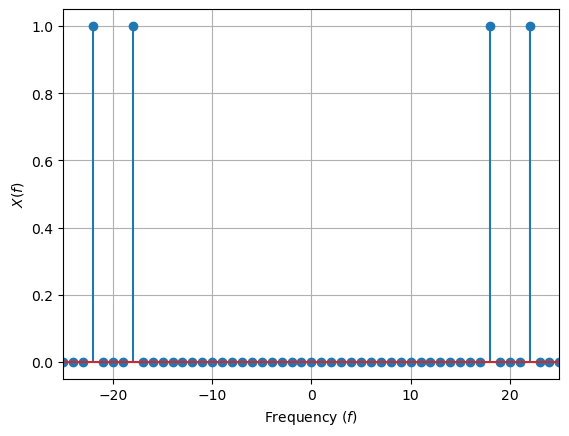

In [11]:
## Compute the spectrum vector
Xv = analyze_signal(xx)
fv = np.arange(-N/2, N/2, 1) * fs/N

# and plot it
plt.stem(fv, np.abs(Xv))
plt.grid()
plt.xlabel('Frequency ($f$)')
plt.ylabel('$X(f)$')
plt.xlim(-25, 25)

plt.show()

## Summary

We now have two important functions that we will be using a lot going forward:
* `analyze_signal` computes the spectrum representation from a sampled signal
* `synthesize_from_vector` reconstructs a signal from its spectrum represntation

Note that when these functions are invoked back-to-back we get the signal back, i.e., when calling
``` python
xr = synthesize_from_vector( analyze_signal( xx) ) 
```
then `xr` will equal `xx`.

We can apply these functions to any length-$N$ signal. Thus, we can compute the spectrum representation of any signal. Therefore, we can represent any length-$N$ signal as a sum of sinusoids.

These are very fundamental insights.

## Appendix: A function to plot the spectrum

We will frequently plot the spectrum of a signal. Therefore it is good to automate this process using a function.

We make three changes relative to how we plotted the spectrum before:

1. The spectrum of a signal is complex valued. So far, we have only plotted the magnitude (since we knew that the phse is zero). We should, however, reflect that the spectrum is complex-valued. This is usually done by plotting the magnitude and the phase of the spectrum.

2. When the number of samples is greater than approximately 50, the `stem` plots get very unwieldy. Then it is easier to make line plots. 

3. Moreover, the magnitude of spectra tend to have both large and very small values. It is easier to see the range of values when the y-axis of the magnitude is logarithmic.

Here is a function to do that.

In [12]:
def plot_spectrum(Xv, fs, doStem=False):
    """Plot magnitude and phase of the spectrum"""

    N = len(Xv)
    ff = np.arange(-N/2, N/2, 1) * fs/N

    fig, (axm, axp) = plt.subplots(2, 1, layout='constrained')
    
    if doStem:
        axm.stem(ff, np.abs(Xv))
    else:
        axm.semilogy(ff, np.abs(Xv))
    axm.grid()
    axm.set_ylabel('Magnitude')

    if doStem:
        axp.stem(ff, np.angle(Xv)/np.pi)
    else:
        axp.plot(ff, np.angle(Xv)/np.pi)
    axp.set_xlabel('Frequency (Hz)')
    axp.set_ylabel('Phase (rad/$\pi$)')
    axp.grid()

    plt.show()

### Example: Stem plot of Spectrum

Here is an example of a stem plot of a spectrum. This spectrum has 64 frequencies which are still discernible.

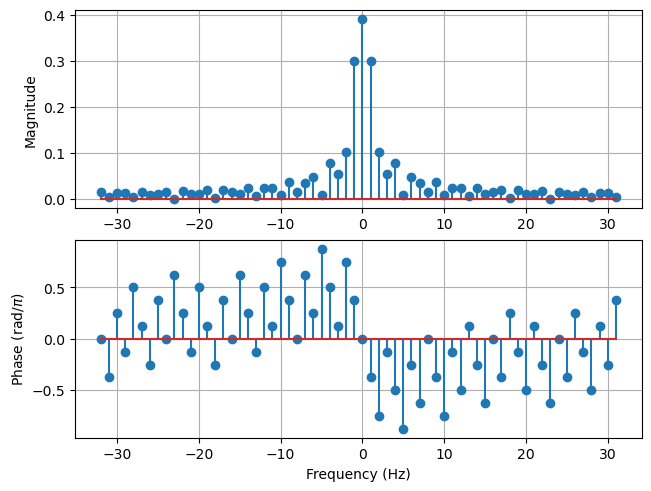

In [13]:
# signal that has a nice spectrum
fs = 64
sig = np.zeros(fs)
sig[:25] = 1

# compute spectrum
X_rect =analyze_signal(sig)

# and plot it
plot_spectrum(X_rect, fs, doStem=True)

### Example: Line plot of spectrum

The spectrum below has 256 frequencies and a line plot is more appropriate than a stem plot. 

The logarithmic scale allows us to see small magnitude values very accurately. On a linear scale, we would simply see that most of the magnitudes at higher frequencies are close to zero.

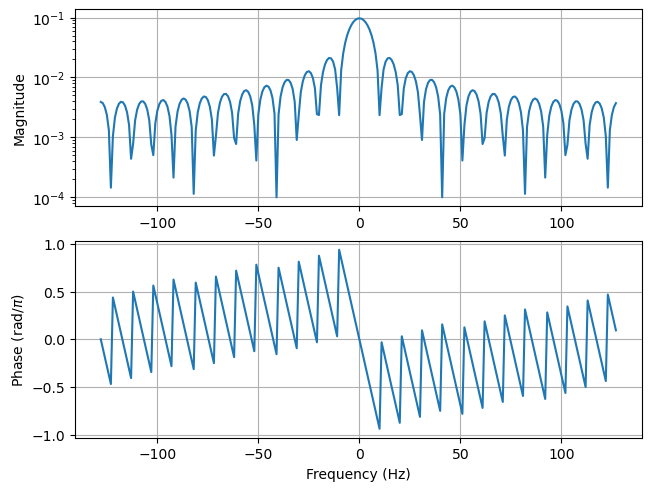

In [14]:
# signal that has a nice spectrum
fs = 256
sig = np.zeros(fs)
sig[:25] = 1

# compute spectrum
X_rect =analyze_signal(sig)

# and plot it
plot_spectrum(X_rect, fs)